In [23]:
from numpy import *
from netCDF4 import * 
from datetime import *
import matplotlib.pyplot as plt
nc_path='/home/hungday/Documents/python/Data-visualization-/wrfout_d02_2019-11-12_sample.nc'
nc_file=Dataset(nc_path,'r')


In [24]:
for name in nc_file.variables.keys():
    if (name not in nc_file.dimensions.keys()):
        data=nc_file.variables[name]
        print(name,'\t',data.units,'\t\t',data.shape,'\t',data.dtype,'\t',data.dimensions)


XLONG 	 degree_east 		 (120, 111) 	 float32 	 ('south_north', 'west_east')
XLAT 	 degree_north 		 (120, 111) 	 float32 	 ('south_north', 'west_east')
Q2 	 kg kg-1 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
T2 	 K 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
PSFC 	 Pa 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
U10 	 m s-1 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
V10 	 m s-1 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
RAINNC 	 mm 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')


In [25]:
from mpl_toolkits.basemap import Basemap

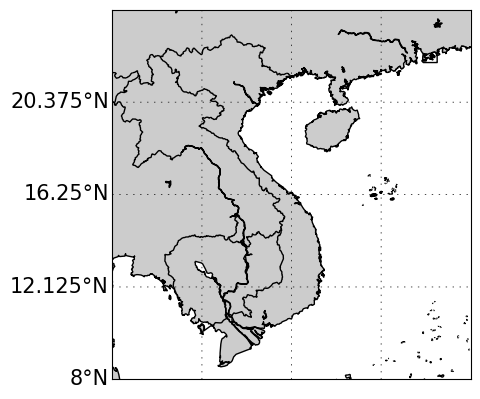

In [26]:
#load the data
data=squeeze(nc_file.variables['T2'][:])
lat=squeeze(nc_file.variables['XLAT'][:])
lon=squeeze(nc_file.variables['XLONG'][:])
#define geographic boundaries
lon_min=100
lon_max=116
lat_min=8
lat_max=24.5
#plot setup
map2=Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)
#draw decoration
map2.fillcontinents()
map2.drawcoastlines(zorder=11)
map2.drawcountries(linewidth=1,color='k')
#draw parallels
parallels=arange(lat_min,lat_max,(lat_max-lat_min)/4)
meridians=arange(lon_min,lon_max,(lon_max-lon_min)/4)
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15,zorder=12)
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15,zorder=12)

#draw islands 
map2.readshapefile('/home/hungday/Documents/python/Data-visualization-/Islands/haidao','haidao',linewidth=1,color='k')
#plot data
plt.show()




# Ex1


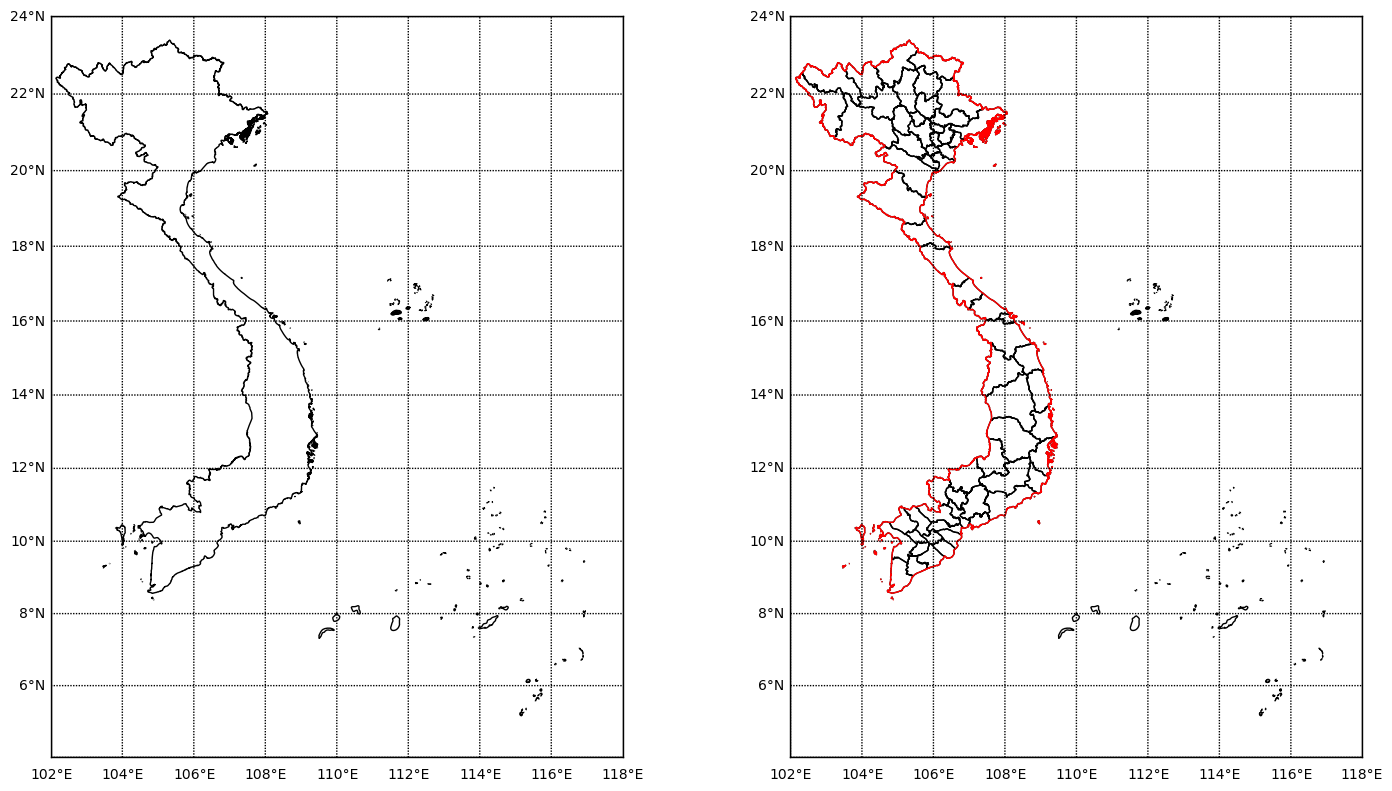

In [27]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
longitudeHS=15
latitudeHS=111
longitudeTS=6
latitudeTS=110

#firstmap
m1=Basemap(projection='merc',llcrnrlat=4,urcrnrlat=24,llcrnrlon=102,urcrnrlon=118,resolution='i',ax=ax[0])
m1.readshapefile('gadm41_VNM_0/gadm41_VNM_0',name='VietNam',linewidth=1,color='k')
m1.readshapefile('/home/hungday/Documents/python/Data-visualization-/Islands/haidao',name='haidao',linewidth=1,color='k')
m1.drawmapboundary(fill_color='white')
m1.drawparallels(range(0,30,2),labels=[1,0,0,0])
m1.drawmeridians(range(100,120,2),labels=[0,0,0,1])


#second map
m2=Basemap(projection='merc',llcrnrlat=4,urcrnrlat=24,llcrnrlon=102,urcrnrlon=118,resolution='i',ax=ax[1])
m2.readshapefile("gadm41_VNM_0/gadm41_VNM_1",name='vietnam_provincial',linewidth=1,color='k')
m2.readshapefile('gadm41_VNM_0/gadm41_VNM_0',name='vietnam',linewidth=1,color='r')
m2.readshapefile('/home/hungday/Documents/python/Data-visualization-/Islands/haidao',name='haidao',linewidth=1,color='k')
m2.drawmapboundary(fill_color='white')
m2.drawparallels(range(0,30,2),labels=[1,0,0,0])
m2.drawmeridians(range(100,120,2),labels=[0,0,0,1])


plt.tight_layout()
plt.show()


# ex2

In [28]:
print(f'shape of lat, lon: {lat.shape},{lon.shape}')
print(f'shape of data:{data.shape}')

shape of lat, lon: (120, 111),(120, 111)
shape of data:(24, 120, 111)


# ex3


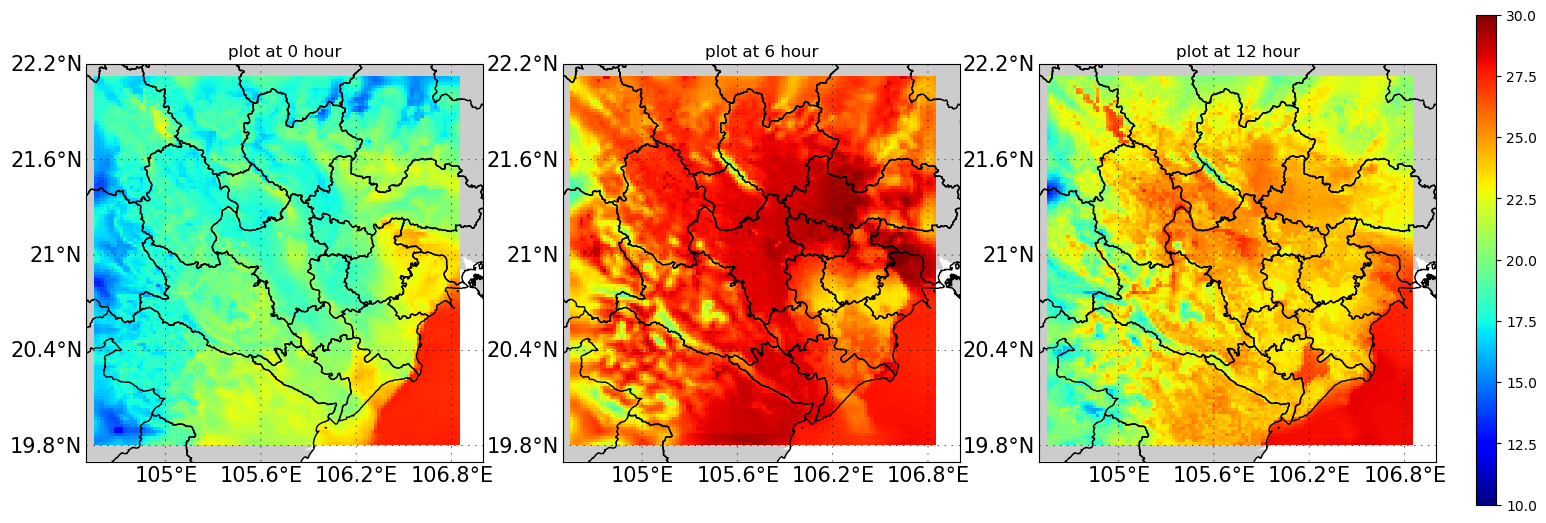

In [48]:
fig=plt.figure(figsize=(20,7))
lon_min=104.5
lon_max=107
lat_min=19.7
lat_max=22.2

for i in range(3):
    ax = plt.subplot(1,3, i+1)
    map2 = Basemap(projection='merc',
                  llcrnrlon=lon_min, #lower left corner longtitude
                  llcrnrlat=lat_min, #lower left corner lattitude
                  urcrnrlon=lon_max, #upper right corner longtitude
                  urcrnrlat=lat_max, #upper right corner lattitude
                  resolution='i',epsg=4326)
    map2.fillcontinents(zorder=0)
    parallels = arange(-90.,150., around((lat_max-lat_min)/4, decimals=1)) 	#lat
    meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
    map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
    map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
    #add vietName
    map2.readshapefile(r'gadm41_VNM_0/gadm41_VNM_1', "gadm41_VNM_1", linewidth=1,color='k')
    #plot data
    hour=i*6
    cm = plt.pcolormesh( lon , lat , data[hour,:,:]-273.15,vmin = 10,vmax = 30,cmap='jet')
    plt.title(f"plot at {hour} hour")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, #left - right align
                        0.15,  #up - down align 
                        0.01, #width
                        0.7 # height
                        ])
fig.colorbar(cm,cbar_ax)
plt.show()

# Ex4

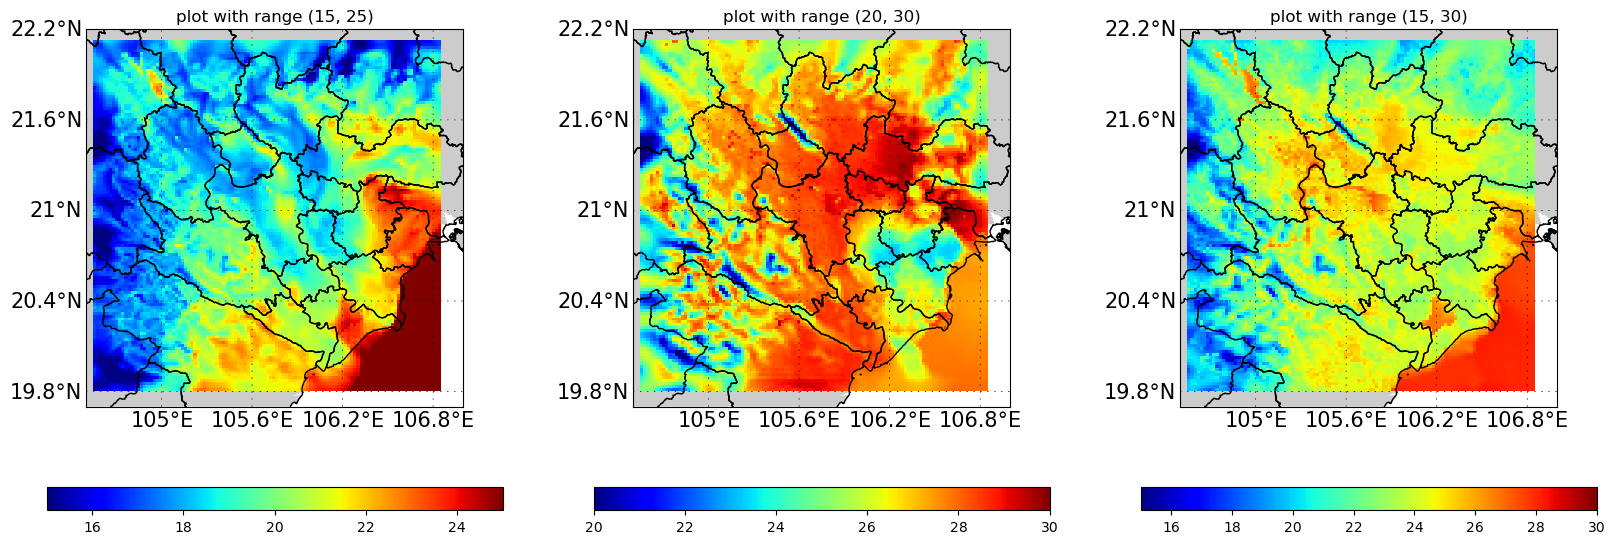

In [51]:
fig=plt.figure(figsize=(20,7))
lon_min=104.5
lon_max=107
lat_min=19.7
lat_max=22.2
vrange=[(15,25),(20,30),(15,30)]
for i in range(3):
    ax = plt.subplot(1,3, i+1)
    map2 = Basemap(projection='merc',
                  llcrnrlon=lon_min, #lower left corner longtitude
                  llcrnrlat=lat_min, #lower left corner lattitude
                  urcrnrlon=lon_max, #upper right corner longtitude
                  urcrnrlat=lat_max, #upper right corner lattitude
                  resolution='i',epsg=4326)
    map2.fillcontinents(zorder=0)
    parallels = arange(-90.,150., around((lat_max-lat_min)/4, decimals=1)) 	#lat
    meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
    map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
    map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
    #add vietName
    map2.readshapefile(r'gadm41_VNM_0/gadm41_VNM_1', "gadm41_VNM_1", linewidth=1,color='k')
    #plot data
    hour=i*6
    cm = plt.pcolormesh( lon , lat , data[hour,:,:]-273.15,vmin = vrange[i][0],vmax = vrange[i][1],cmap='jet')
    plt.title(f"plot at {hour} hour")
    fig.colorbar(cm,orientation='horizontal')
    plt.title(f"plot with range {vrange[i]}")
    
plt.show()